In [1]:
%pip install seaborn
import os

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

In [3]:
df = pd.read_csv('./dataSet/train.csv')

In [ ]:
df.info()

There are 900,000 rows (instances) with 30 features and one target variable
1. There is also no null value.
2.One object dtype (maybe no categorical).
Separating into different variables

In [ ]:
integer = df.select_dtypes(int)
integer = integer.drop(['id','target'], axis =1)
integer.attrs['name'] = "integer" 
continuous = df.select_dtypes(float)
continuous.attrs['name'] = "continuous" #associating the name attribute to datase
#continuous.head()
word = df.select_dtypes(object)
word.attrs['name'] = "word"
word.head()
#word.head()
#integer.head()


In [ ]:
df.describe()

In [ ]:
def plotFeatures(dataset, cols = 3):
    rows = math.ceil(dataset.shape[1]/cols)
    print (rows)
    fig, ax = plt.subplots(rows,cols, figsize = (20,16))
    ax = ax.flatten()
    for i, col in enumerate(dataset.columns):
        if dataset.attrs['name']== "integer":
            sns.countplot(x=dataset[col], data = dataset, ax = ax[i])
        if dataset.attrs['name']=="continuous":
            sns.histplot(data = dataset, x = dataset[col], stat ='count', ax = ax[i])
            

In [ ]:
#Checking how the integer variable looks like.
plotFeatures(integer, cols = 3)

We notice most of the features vary from 0 to 8 mostly. They have simiar behavior increase till the 2-3 and then start to decrease. 
Only f_29 and f_30 have 2/3 discrete values making a ordinal categorical dataset.

In [ ]:
#Cheking how the continuous variable looks like 
plotFeatures(continuous, cols = 3)

all the features have continuous behavior ranging from -4 to +4 until f_05 then it spans from -10 to +10 and for f_28 it spans from -1000 to +1000.
1.It is hence, important to scale te f_28
2. Plot the box plot and relation with the target values

In [ ]:
#Let's see how the f_27 behaves

In [ ]:
word.value_counts()

PlotVar(df, cols = 3,width=20, height=20, hspace=0.45, wspace=0.5)

In [ ]:
# number of target values.
df['target'].value_counts()

In [ ]:
#plotting the target values
fig, ax = plt.subplots(1,2, figsize = (14,6))
fig.subplots_adjust(wspace=0.3)
sns.boxplot(y='target', data = df,ax = ax[0], showmeans=True, 
           boxprops = dict(alpha = 0.6), width = 0.5,
           meanprops = {"marker":"o", "markerfacecolor" : "gray", "markeredgecolor" :"black"})
ax[0].set_ylabel('Target')
#looking at histo
sns.histplot(x = 'target', data = df)
ax[1].set_ylabel('Counts')
ax[1].set_xlabel('Count')
plt.suptitle(f'Distribution of target')
plt.show()

We notice that there are some features which has 7-18 few values. This information could be better described by a box plot along with their relation with the target value . and Correlation

In [ ]:
plt.figure(figsize = (30,15))
sns.heatmap(df.corr(), cmap ='BrBG')#, vmin = -1, vmax = 1,annot = True)
plt.title('Correlation heatmap',fontdict={'fontsize':20})


We notice that all the features are -vely correlated except a couple of features which has small +ve correl
f_28 is strongly correlated with f_00 - f_06

In [ ]:
word.duplicated().sum() #number of duplicates

In [ ]:
df['f_27'].str.count('A') #tells the number of A = pattern

In [ ]:
print(df['f_27'].str.startswith('A'), df['f_27'].str.endswith('A'))

In [ ]:
df['f_27'].str.findall('AB').value_counts()

import string
alphabet_upper = list(string.ascii_uppercase)

char_counts = []
for character in alphabet_upper:
    char_counts.append(df["f_27"].str.count(character).sum())


print(char_counts)

print(alphabet_upper)

In [ ]:
bbbbb

In [4]:
import string

In [5]:
alphabet= list(string.ascii_uppercase) #loading all the alphabet in the uppercase

In [6]:
char_count=[]#iniitalising an empty list to keep the count of # alphabet
for character in alphabet:
    char_count.append(df['f_27'].str.count(character).sum()) #can't use a df for this.. need a list

In [7]:
print(char_count)

[2214818, 2919752, 1331088, 926075, 537776, 283771, 147484, 84653, 59478, 50043, 47008, 46099, 46104, 45943, 45442, 45277, 44641, 43438, 41835, 39275, 0, 0, 0, 0, 0, 0]


In [8]:
# initialize list of lists
data = {'Alphabet' :alphabet,'Count': char_count}
 
# Create the pandas DataFrame
word = pd.DataFrame(data)#, columns=['Alphabet', 'Count'])
 



In [ ]:
word.head()

<AxesSubplot:xlabel='Alphabet', ylabel='Count'>

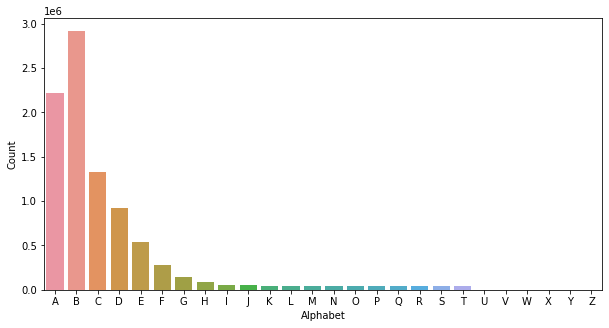

In [9]:
sns.barplot(data = word, x ='Alphabet', y ='Count')

In [ ]:
df['f_27'].str.get(0)

In [38]:
word = word.loc[word['Count']>0]

In [39]:
word.set_index('Alphabet')

,Count,character1,character2,character3,character4,character5,character6,character7,character8,character9,character10
Alphabet,,,,,,,,,,,
A,2214818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B,2919752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C,1331088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D,926075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E,537776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F,283771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G,147484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H,84653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I,59478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Position : 0
A    451207
B    448793
Name: f_27, dtype: int64
Position : 1
B    245160
C    225931
D    149579
A    144762
E     78807
F     35487
G     13713
H      4647
I      1361
J       410
K       113
L        25
M         3
N         2
Name: f_27, dtype: int64


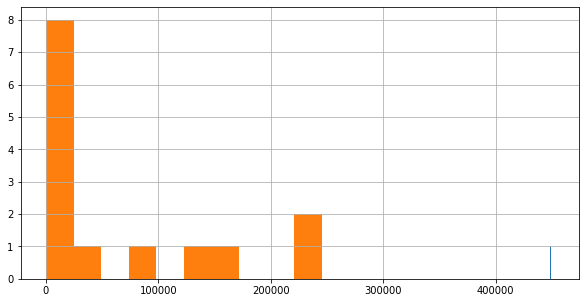

In [60]:
#Defining a new 
for i in range(2):
    print(f'Position :',i)
    print(df["f_27"].str.get(i).value_counts())
    df["f_27"].str.get(i).value_counts().hist()
   # word[i+1] = df["f_27"].str.get(1).value_counts()
   # ax = plt.subplot(5,2,i+1)
   # ax = sns.histplot(data = df, x= df["f_27"].str.get(i).value_counts());
    #word["character"+str(i+1)] = df["f_27"].str.get(1).value_counts()
    
#word = word.fillna(0)
#word

In [35]:
df["f_27"].str.get(1).value_counts()

B    245160
C    225931
D    149579
A    144762
E     78807
F     35487
G     13713
H      4647
I      1361
J       410
K       113
L        25
M         3
N         2
Name: f_27, dtype: int64

In [43]:
word

,Alphabet,Count,character1,character2,character3,character4,character5,character6,character7,character8,character9,character10
0,A,2214818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B,2919752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C,1331088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D,926075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E,537776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,F,283771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,G,147484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,H,84653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,I,59478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,J,50043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for column in word.columns :
    word[column] = df["f_27"].str.get(1).value_counts()

In [23]:
character_cols = [i for i in word.columns if "alphabet" in i]

In [24]:
character_cols

[]

In [26]:
for i, column in enumerate(character_cols):
    ax = plt.subplot(5,2,i+1)
    ax = sns.barplot(data = word, x="Alphabet", y=column, color="blue");
    plt.title("Character value counts in position: " +str(i+1));
    ax.set_ylabel("Character Count")